In [1]:
import sys
import platform
from os.path import join, exists, abspath, dirname
from os import getcwd, makedirs
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps, cm, colors
import scipy
import h5py
import seaborn as sns

from tqdm import tqdm

In [2]:
import nibabel as nb
from nilearn import plotting, image
from nipype.interfaces import fsl

In [3]:
dir_current = getcwd().replace('\\','/')

tmp = dir_current.split('/')
idx = [ii for ii, s in enumerate(tmp) if s=='github'][0]

dir_git = '/'.join(tmp[:idx+1])
dir_git

'/Users/sungbeenpark/github'

In [4]:
dname = join(dir_git,'nitools')
sys.path.append(dname)
import nitools as nt

In [5]:
dname = join(dir_git,'SUITPy')
sys.path.append(dname)
import SUITPy as suit

In [6]:
dname = join(dir_git)
sys.path.append(dname)
import surfAnalysisPy as surf

In [7]:
dname = join(dir_git,'SeqSpatialSupp_fMRI')
sys.path.append(dname)
from SSS import deal_spm
from SSS import util as su

---

### check the design matrix and the basis function

In [8]:
dir_root = su.get_dir_root()
dir_root

'/Volumes/Diedrichsen_data$/data/SeqSpatialSupp_fMRI'

In [14]:
subj = 'S01'
glm = 'glm_3'

SPM = join(dir_root,glm,subj,'SPM.mat')
exists(SPM)
SPM = su.load_SPM(SPM)

In [15]:
df_onset = deal_spm.get_df_onset(SPM)
df_onset

,run,reg,onset
0,1,Trial-State 1,"[114.032003, 159.03000200000002, 179.030001, 2..."
1,1,Trial-State 2,"[29.03, 64.03001400000001, 69.03000800000001, ..."
2,1,Trial-State 3,"[24.030014, 34.030004999999996, 139.030001, 21..."
3,1,Trial-State 4,"[9.030012999999999, 39.030003, 49.030013, 59.0..."
4,1,Trial-State 5,"[44.030008, 84.030002, 89.030005, 109.03000100..."
...,...,...,...
67,8,Trial-State 5,"[24.031947000000002, 39.031973, 44.03196, 64.0..."
68,8,Trial-State 6,"[49.031947, 159.031947, 164.031957, 259.031947..."
69,8,Trial-State 7,"[19.031959, 69.03196700000001, 114.031961, 234..."
70,8,Trial-State 8,"[29.031958, 59.031956, 79.03195600000001, 84.0..."


In [16]:
df_vec = deal_spm.get_df_vec(SPM)
df_vec

,part_vec,cond_vec
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
67,8,5
68,8,6
69,8,7
70,8,8


In [37]:
ref = SPM['xX/K/row'][0,0]
SPM[ref][:].reshape(-1).astype(int)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [40]:
SPM['xX/iC'][:].reshape(-1).astype(int)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72.])

In [12]:
X = deal_spm.get_SPM_X(SPM)
X.shape

(3280, 80)

In [12]:
run = 'r01'
ii = 0
idx_row = np.arange(410*ii,410*(ii+1))
idx_col = np.arange(9*ii,9*(ii+1))[:-1]

X = (SPM['xX']['X'][:].T)[idx_row,:][:,idx_col]

reg = 'Trial-State 1'
jj = 0
plt.plot(X[:,jj])

df = pd.DataFrame()
df['onset'] = df_onset[(df_onset.run==run)&(df_onset.reg==reg)]
df['stim'] = 0.1
for kk, row in enumerate(df.iterrows()):
    label = ''
    if kk==0:
        label = 'stimulus'
    onset = row[1].onset
    stim = row[1].stim
    x = [onset-1.5, onset-1.5, onset+1.5, onset+1.5]
    y = [0, stim, stim, 0]
    plt.fill(x,y, color='black', alpha=0.5, label=label)
plt.grid(axis='both')
plt.legend()

TypeError: string indices must be integers

In [13]:
def get_xBF_params(xBF):
    # xBF = SPM['xBF']
    dict_feature = {}
    for key, feature in xBF.items():
        tmp = feature[:].copy()
        if np.ndim(tmp) > 1:
            tmp = tmp.flatten()
        if len(tmp) == 1:
            tmp = tmp[0]
        if tmp.dtype == np.uint16:
            tmp = ''.join(map(chr, tmp))
        dict_feature[key] = tmp
    return dict_feature

In [14]:
def plot_BF(xBF):
    dict_feature = get_xBF_params(xBF)
    
    x = np.arange(dict_feature['T0'],dict_feature['length']+dict_feature['T0'],dict_feature['dt'])
    y = dict_feature['bf']
    
    plt.plot(x, y)
    plt.grid(axis='y')
    plt.xlim(-1,34)
    
    y = 0.007
    dy = 0.001
    
    x = dict_feature['T0']
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=2)
    plt.text(x=x, y=y+dy, s='onset', ha='center', va='center')
    x = dict_feature['length']+dict_feature['T0']
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=2)
    plt.text(x=x, y=y+dy, s='offset', ha='center', va='center')
    x = dict_feature['params'][0]
    plt.axvline(x=x, color='blue', linestyle='--', linewidth=2)
    plt.text(x=x, y=y-dy, s='response', ha='center', va='center')
    x = dict_feature['params'][1]
    plt.axvline(x=x, color='red', linestyle='--', linewidth=2)
    plt.text(x=x, y=y+dy, s='undershoot', ha='center', va='center')
    plt.title(dict_feature['params'])

In [15]:
# plot_BF(SPM['xBF'])

---

## FreeSurfer

Atlas

In [16]:
dir_atlas = join(dir_git,'SeqSpatialSupp_fMRI/atlas/fs_LR_32k')

In [17]:
underlay = join(dir_atlas,'fs_LR.32k.LR.sulc.dscalar.gii')
border = join(dir_git,'surfAnalysisPy/standard_mesh/fs_L/fs_LR.32k.L.border')

In [18]:
# list_roi = ['SMA', 'PMv', 'PMd', 'M1', 'S1', 'SPLa', 'SPLp', 'DSVC', 'MT+', 'VSVC', 'EAC']
list_roi = ['S1', 'M1', 'PMd', 'PMv', 'SMA', 'V1', 'SPLa', 'SPLp']

In [19]:
def gifti_to_cmap(label_img):
    if isinstance(label_img, str):
        label_img = nb.load(label_img)
    if not isinstance(label_img, nb.gifti.gifti.GiftiImage):
        raise TypeError("Expected 'gifti' file")

    labels = label_img.labeltable.labels
    rgba = np.zeros((len(labels),4))
    for i,label in enumerate(labels[1:]):
        rgba[i+1,:] = labels[i].rgba
    
    cmap = colors.ListedColormap(rgba, N=len(rgba))

    return cmap

In [20]:
def cmap_to_cbar(cmap, list_label, dir_result=None):
    # 0~11 값이 각각 구간 중앙에 오도록 boundaries 설정
    N = cmap.N
    norm = colors.BoundaryNorm(boundaries=np.arange(-0.5, N, 1), ncolors=N)
    
    # colorbar만 따로 그리기
    fig, ax = plt.subplots(figsize=(8, 1))
    fig.subplots_adjust(bottom=0.5)
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # 더미 mappable
    
    cbar = fig.colorbar(sm, cax=ax, orientation='horizontal', ticks=np.arange(N))
    
    # 라벨을 변경
    if N == len(list_label)+1:
        labels = np.concatenate((['0'],list_label))
    elif N == len(list_label):
        labels = list_label
    else:
        labels = 0
    cbar.ax.set_xticklabels(labels)
    
    plt.show()
    if dir_result != None:
        fig.savefig(
            join(dir_result,'fig.ROI.cbar.png'),
            dpi=300, facecolor=[1,1,1,1],
            bbox_inches='tight'
        )

9 [0 1 2 3 4 5 6 7 8]


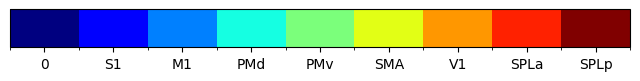

In [21]:
# data = nb.load(join(dir_atlas,'ROI.L.SSS.label.gii'))
data = nb.load(join(dir_atlas,'ROI.32k.L.label.gii'))
tmp = np.unique(data.darrays[0].data)
print(len(tmp), tmp)

# cmap = gifti_to_cmap(data)
cmap = cm.jet.resampled(9)
cmap_to_cbar(cmap, list_roi, dir_result)

<Axes: >

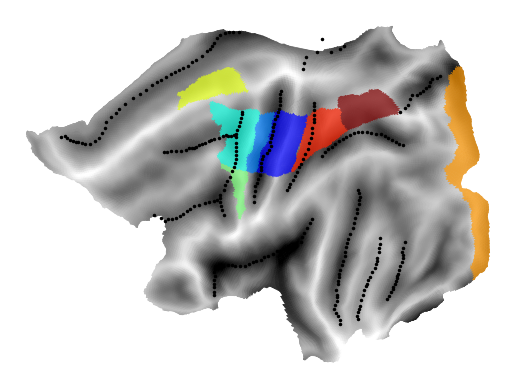

In [22]:
fig, ax = plt.subplots()

plt.sca(ax)
surf.plot.plotmap(
    data=data,
    surf='fs32k_L',
    underlay=underlay, alpha=0.7, cmap=cmap, colorbar=False,
    borders=border, bordercolor='black', bordersize=3,
    overlay_type='func', render='matplotlib'
)
# fig.savefig(
#     join(dir_result,'fig.ROI.png'),
#     dpi=300, facecolor=[1,1,1,1],
#     bbox_inches='tight'
# )

## Deformated ROIs

In [23]:
dir_roi = join(dir_root,'ROI')
dir_anat = join(dir_root,'anatomicals')

In [24]:
list_roi

['S1', 'M1', 'PMd', 'PMv', 'SMA', 'V1', 'SPLa', 'SPLp']

In [25]:
subj = 'S01'
underlay = join(dir_anat,subj,'%s_anatomical.nii'%subj)

In [26]:
def load_roi(subj,glm):
    S_id = subj.replace('R','S')
    for ii, roi in enumerate(tqdm(list_roi)):
        fname = join(dir_roi,S_id,'ROI.L.%s.%s.nii'%(S_id,roi))
        img_deform = nb.load(fname)
        if ii == 0:
            img_roi = img_deform
        else:
            img_roi = image.math_img(
                formula="img1 + (img1==0)*img2*%d"%(ii+1), ## deformation 과정에서 overlap 된 영역이 많이 생김.
                img1=img_roi, img2=img_deform,
                copy_header_from="img1"
            )
            
    return img_roi

In [27]:
glm = 'glm_3'
img_roi = load_roi(subj, glm=glm)

100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.94it/s]


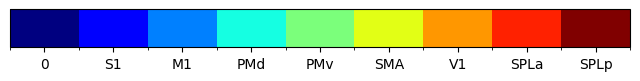

In [28]:
cmap_to_cbar(cmap, list_roi)

In [29]:
for ii, roi in enumerate(list_roi):
    idx = img_roi.get_fdata()==(ii+1)
    print(roi, idx.sum())

S1 1114
M1 565
PMd 1618
PMv 526
SMA 900
V1 1514
SPLa 1008
SPLp 1203


In [30]:
nn = '14'
subj = 'S'+nn

S_id = subj.replace('R','S')
underlay = join(dir_anat,S_id,'%s_anatomical.nii'%S_id)
img_roi = load_roi(subj,glm)

plotting.view_img(
    stat_map_img=img_roi,
    bg_img=underlay,
    cmap=cmap, colorbar=False,
    symmetric_cmap=False, vmin=0, vmax=tmp.max()
)

del img_roi

100%|██████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.68it/s]
/opt/anaconda3/envs/SSS/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:820: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [31]:
# for ss in ['S','R']:
#     subj = ss+nn
    
#     S_id = subj.replace('R','S')
#     underlay = join(dir_anat,S_id,'%s_anatomical.nii'%S_id)
#     img_roi = load_roi(subj,glm)
    
#     fig, ax = plt.subplots()
    
#     g = plotting.plot_roi(
#         roi_img=img_roi,
#         bg_img=underlay,
#         cut_coords=[-30, -72, 54], draw_cross=False,
#         cmap=cmap, colorbar=False,
#         # view_type='contours',
#         black_bg=True,
#         axes=ax
#     )
#     ax.set_title(subj)
    
#     # fig.savefig(
#     #     join(dir_result,'fig.%s.ROI.volume.%s.png'%(glm,subj)),
#     #     dpi=300, facecolor=[1,1,1,1],
#     #     bbox_inches='tight'
#     # )

---

## Extracted $ys$ by Matlab

In [32]:
# def load_ts(subj,glm,dir_work):
#     ## load data
#     matfile = join(dir_work,'%s.glm%d.11rois.mat'%(subj,glm))
#     file = h5py.File(matfile)
#     data = file['Q']
#     D = data['Y']['D']
#     onsets = D['ons'][:].flatten()
#     start_sess = D['start_sess'][:].flatten()

#     ## arrange the data
#     dict_y = {}
#     for ss in ['y_raw','y_adj','y_hat','y_res']:
#         tmp = np.copy(data['Y'][ss][:])
#         dict_y[ss] = tmp
    
#     return dict_y, onsets, start_sess

In [33]:
# def plot_ts(subj, glm, dir_root, list_roi):
#     ## initialize variables
#     list_run = ['r%02d'%(ii+1) for ii in range(8)]
    
#     ## define directories
#     dir_roi = join(dir_root,'ROI')
#     dir_work = join(dir_roi,'glm%d'%glm,subj)
#     dir_result = dir_work

#     ## load time series
#     dict_y, onsets, start_sess = load_ts(subj, glm, dir_work)
    
#     ## plot the figure
#     nrows = 8
#     for ii, roi in enumerate(list_roi):
#         fig, axs = plt.subplots(nrows=nrows, figsize=(30,3*nrows))
#         for rr, run in enumerate(list_run):
#             ax = axs[rr]
#             plt.sca(ax)
        
#             idx_tr = np.arange(410*rr,410*(rr+1))
#             idx_trial = np.arange(68*rr,68*(rr+1))
            
#             df = pd.DataFrame()
#             for ss in ['y_adj','y_hat','y_res']:
#                 df[ss] = dict_y[ss][ii,idx_tr]
            
#             sns.lineplot(data=df, ax=ax)
#             xticks = sorted(onsets[idx_trial]) - start_sess[rr]
#             ax.set_xticks(xticks)
#             xticklabels = ['%d'%(int(t)) for t in xticks]
#             ax.set_xticklabels(xticklabels, rotation=30)
#             ax.grid(axis='both')
#             handles, labels= ax.get_legend_handles_labels()
#             ax.legend(handles=handles, labels=labels, loc='upper left')
#             ax.set_ylabel(run, fontsize=15)
#             ax.set_title('%s (%s)'%(subj,roi), fontsize=15, loc='left')
        
#         fig.savefig(
#             join(dir_result,'fig.ts.%s.%s.png'%(subj,roi)),
#             dpi=300, facecolor=[1,1,1,1],
#             bbox_inches='tight'
#         )
#         plt.close(fig)

In [34]:
# for ss in ['S','R']:
#     for nn in list_nn:
#         subj = ss+nn
#         plot_ts(subj=subj, glm=3, dir_root='/mnt/f/SeqSpatialSupp_fMRI', list_roi=list_roi)

---

### `spmj_fit_hrfparams_example.m`

In [35]:
subj = 'S01'

#### 1. hrf

In [36]:
glm = 'glm_3'
dir_glm = join(dir_root,glm)

In [37]:
def load_xBF(fname):
    file = h5py.File(fname)
    xBF = file['xBF']
    return xBF

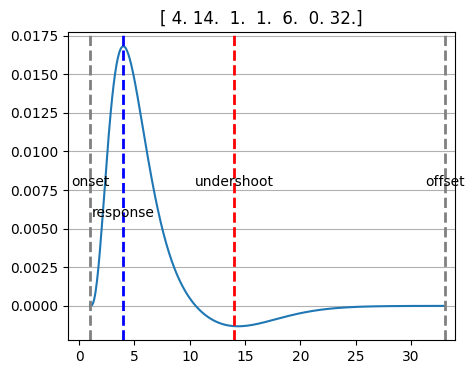

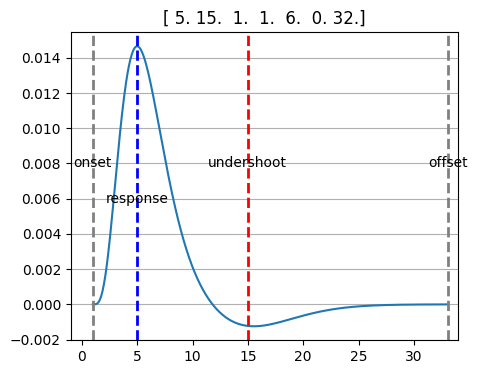

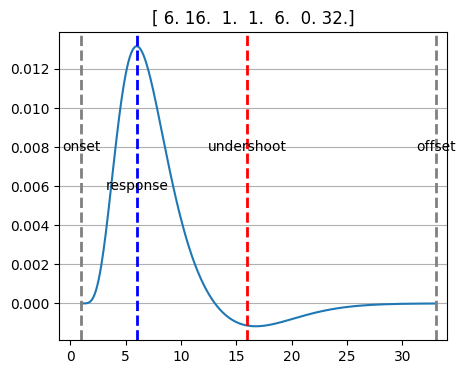

In [38]:
for param in ['[4 14]','[5 15]','[6 16]']:
    fig, ax = plt.subplots(figsize=(5,4))
    plt.sca(ax)
    fname = join(dir_glm,subj,'hrf_tune/xBF_%s.mat'%param)
    xBF = load_xBF(fname)
    plot_BF(xBF)

    # fig.savefig(
    #     join(dir_result,'fig.%s.hrf.png'%glm),
    #     dpi=300, facecolor=[1,1,1,1],
    #     bbox_inches='tight'
    # )

#### 2. overall response of $X$ by run

In [39]:
fname = join(dir_glm,subj,'SPM.mat')
SPM = load_spm(fname)

rr = 1
idx_row = np.arange(410*rr,410*(rr+1))
idx_col = np.arange(9*rr,9*(rr+1))[:-1]

X = (SPM['xX']['X'][:].T)[idx_row,:][:,idx_col]
X.shape

(410, 8)

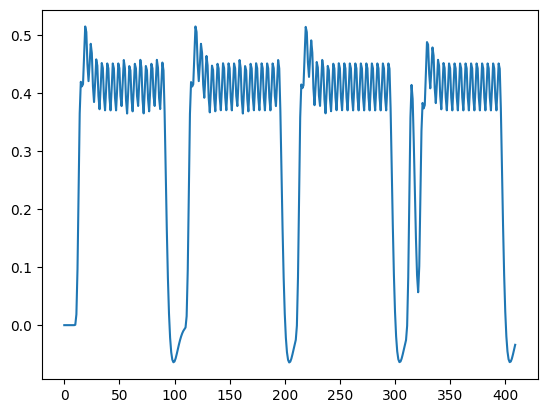

In [40]:
y = X.sum(axis=1)
plt.plot(y)
# y = X
# plt.plot(y)

In [41]:
del SPM, X

#### 3. overall response of $y$ by run

In [42]:
def load_y(y_raw, y_hat=None, y_res=None, plot=False, show_y_raw=False):
    df = pd.DataFrame()
        # data.shape = (8 runs * 410 TRs/run, nvoxels)
    df['y_raw'] = np.mean(nb.load(y_raw).get_fdata(), axis=1)
    if y_hat != None:
        df['y_hat'] = np.mean(nb.load(y_hat).get_fdata(), axis=1)
    if y_res != None:
        df['y_res'] = np.mean(nb.load(y_res).get_fdata(), axis=1)
    if (y_hat != None)&(y_res != None):
        df['y_adj'] = df['y_hat'] + df['y_res']
    else:
        show_y_raw = True
    if not show_y_raw:
        df = df.drop(columns=['y_raw'])

    if plot:
        nrows = 8
        fig, axs = plt.subplots(nrows=nrows, figsize=(12,3*nrows))
        for rr, run in enumerate(['r%02d'%(ii+1) for ii in range(8)]):
            ax = axs[rr]
            plt.sca(ax)
            
            idx = np.arange(410*rr,410*(rr+1))
            
            sns.lineplot(df.iloc[idx], ax=ax)
            ax.grid(axis='both')
            ax.set_title('%s, %s (%s.%s)'%(subj,roi,glm,param), loc='left')
            ax.legend(loc='upper left')
            ax.set_ylabel(run)
            
        fig.tight_layout()
        plt.show()
    
    return df

In [43]:
# def load_y_est(subj, glm, roi, dir_surf):
#     df = pd.DataFrame()
#     for ts in ['y_hat', 'y_res']:
#         fname = join(dir_surf,glm,subj,'cifti.L.glm3.%s.%s.%s.nii'%(subj,roi,ts))
#         # data.shape = (8 runs * 410 TRs/run, nvoxels)
#         df[ts] = np.mean(nb.load(fname).get_fdata(), axis=1)
#     df['y_adj'] = df['y_hat'] + df['y_res']
    
#     return df

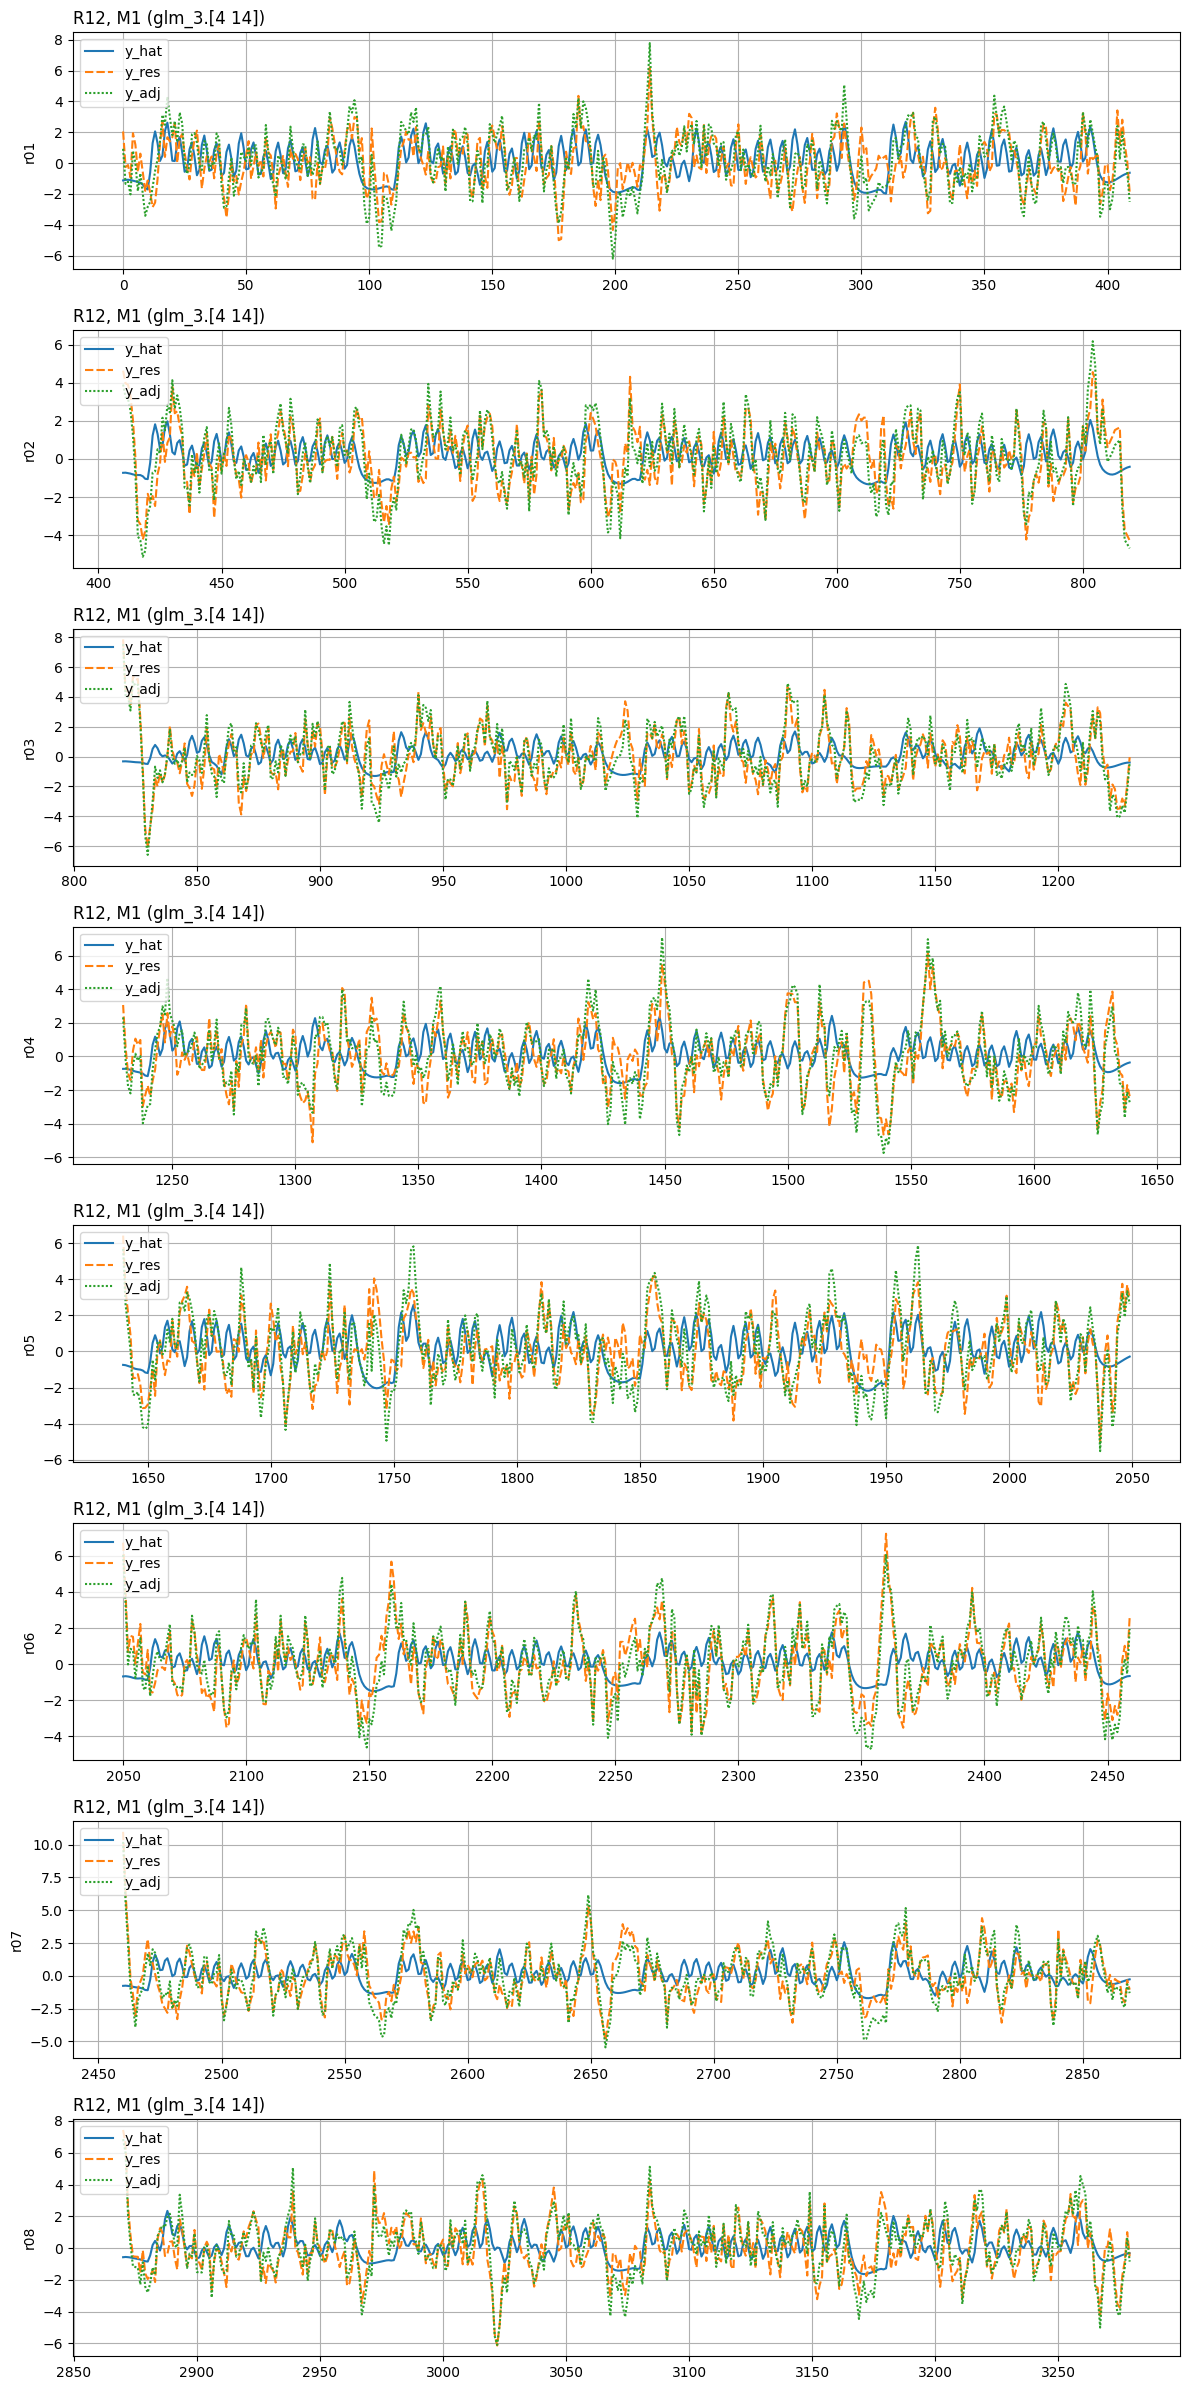

In [44]:
subj = 'R12'

glm = 'glm_3'
dir_glm = join(dir_glm)

roi = 'M1'
param = '[4 14]'

y_raw = join(dir_roi,subj,'cifti.L.%s.%s.y_raw.dtseries.nii'%(subj,roi))
y_hat = join(dir_glm,subj,'hrf_tune/cifti.L.%s.%s.%s.%s.y_hat.dtseries.nii'%(glm,param,subj,roi))
y_res = join(dir_glm,subj,'hrf_tune/cifti.L.%s.%s.%s.%s.y_res.dtseries.nii'%(glm,param,subj,roi))

df = load_y(
    y_raw=y_raw,
    y_hat=y_hat,
    y_res=y_res,
    plot=True
)
df

del df

#### 4. Time series time lock to stimulus onset

In [45]:
def extract_snippets(y, onsets, pre=10, post=20, TR=1):
    ## shape = (# onsets, # TRs within each time window)
    snippets_y = []
    
    for onset in onsets:
        onset_frame = np.round(onset).astype(int) # the fMRI volume closest to the onset time
        # onset_frame = np.round(onset).astype(int) - 1  # in python, the index starts from 0, so we need to subtract 1

        start_idx = onset_frame - pre # <pre> volumes before the onset
        end_idx = onset_frame + post # <post> volumes after the onset

        snippet_y = np.full(pre + post + 1, np.nan) # nan fill the snippet
        
        valid_start = int(max(0, start_idx)) # make sure the start index is not negative
        valid_end = int(min(len(y), end_idx + 1)) # make sure the end index is not out of bounds
        
        insert_start = int(valid_start - start_idx) # where to start inserting the data
        insert_end = int(insert_start + (valid_end - valid_start)) # where to end inserting the data

        snippet_y[insert_start:insert_end] = y[valid_start:valid_end] # insert the data into the snippet
        
        snippets_y.append(snippet_y)
            
    return np.array(snippets_y)

In [48]:
def plot_timelock(dir_root, SPM, glm, list_roi, hrf_param='[6 16]', pre=10, post=20, dir_result=None):
    SPM = load_spm(SPM)
    dict_onset = get_onset(SPM)
    # for kk, key in enumerate(dict_onset.keys()):
    #     print(kk, dict_onset[key].keys())
    
    onsets = np.zeros((8,68))
    for rr, run in enumerate(['r%02d'%(i+1) for i in range(8)]):
        list_ = []
        for key, value in dict_onset[run].items():
            if np.ndim(value)==0:
                continue
            list_.append(value) 
        onsets[rr,:] = np.sort(np.concatenate(list_))

    nrows = 2
    ncols = 4
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3*nrows))
    axs = np.concatenate(axs)

    x = np.linspace(-pre,post,pre+post+1)
    
    for ii, roi in enumerate(list_roi):
        ax = axs[ii]
        plt.sca(ax)
        y_raw = join(dir_root,'ROI',subj,'cifti.L.%s.%s.y_raw.dtseries.nii'%(subj,roi))
        y_hat = join(dir_root,glm,subj,'hrf_tune/cifti.L.%s.%s.%s.%s.y_hat.dtseries.nii'%(glm,hrf_param,subj,roi))
        y_res = join(dir_root,glm,subj,'hrf_tune/cifti.L.%s.%s.%s.%s.y_res.dtseries.nii'%(glm,hrf_param,subj,roi))
        df = load_y(
            y_raw=y_raw,
            y_hat=y_hat,
            y_res=y_res,
            plot=False
        )
        y_hat = []
        y_adj = []
        for rr, run in enumerate(['r%02d'%(r+1) for r in range(8)]):
            idx = np.arange(410*rr,410*(rr+1))
            y_hat_tmp = extract_snippets(y=df.loc[idx].y_hat.values, onsets=onsets[rr,:], pre=pre, post=post)
            y_adj_tmp = extract_snippets(y=df.loc[idx].y_adj.values, onsets=onsets[rr,:], pre=pre, post=post)
            y_adj.append(y_adj_tmp.mean(axis=0))
            y_hat.append(y_hat_tmp.mean(axis=0))
            
        y_adj = np.array(y_adj)
        y_hat = np.array(y_hat)
        avg_adj = y_adj.mean(axis=0)
        avg_hat = y_hat.mean(axis=0)
        sem_adj = scipy.stats.sem(y_adj, axis=0)
        ax.plot(x, avg_adj, label='y_adj')
        ax.fill_between(x, avg_adj-sem_adj, avg_adj+sem_adj, color='gray', alpha=0.5)
        ax.plot(x, avg_hat, label='y_hat')
        ax.legend()
        ax.grid(axis='x', linestyle='--')
        ax.set_xlabel('time (sec)')
        ax.set_ylabel('BOLD signal')
        ax.set_title(roi)
        ax.set_xticks(np.arange(-pre,post+1,5))

    fig.suptitle('%s %s'%(subj,hrf_param))
    fig.tight_layout()

    if dir_result != None:
        fig.savefig(
            join(dir_result,'fig.%s.hrf_%s.%s.png'%(glm,hrf_param,subj)),
            dpi=300, facecolor=[1,1,1,1],
            bbox_inches='tight'
        )
        plt.close()
    else:
        plt.show()

In [49]:
glm = 'glm_3'
dir_glm = join(dir_root,glm)
dir_result = join(dir_root,'results/hrf_fit')
makedirs(dir_result, exist_ok=True)

list_subj = []
for ss in ['S','R']:
    for nn in list_nn:
        list_subj.append(ss+nn)
        
for subj in tqdm(list_subj):
    SPM = join(dir_glm,subj,'SPM.mat')
    for param in ['[4 14]','[5 15]','[6 16]','[7 17]','[8 18]','[9 19]']:
        plot_timelock(
            dir_root=dir_root, SPM=SPM,
            glm=glm, list_roi=list_roi,
            hrf_param=param,
            pre=5, post=10,
            dir_result = dir_result
        )

100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:39<00:00, 39.88s/it]


---

## Load $\beta$

In [103]:
subj = 'S01'
glm = 'glm_3'
param = '[6 16]'

dir_work = join(dir_root,glm,subj,'hrf_tune')
exists(fname)

True

In [105]:
def load_glm_info(fname):
    file = h5py.File(fname)
    vec = file['vectors']

    # vec : (# interest, 3) cell type variable
    rows, cols = vec.shape
    
    # column head
    col = 0
    tmp = []
    for row in np.arange(rows):
        ref = vec[row,col]
        tmp.append(''.join(map(chr, file[ref][:].reshape(-1))))
    column_head = np.copy(tmp)
    
    # partition vector
    col = 1
    tmp = []
    for row in np.arange(rows):
        ref = vec[row,col]
        tmp = np.concatenate([tmp, file[ref][:].reshape(-1)]).astype(int)
    part_vec = tmp.copy()
    
    # condition vector
    col = 2
    tmp = []
    for row in np.arange(rows):
        ref = vec[row,col]
        tmp = np.concatenate([tmp, file[ref][:].reshape(-1)]).astype(int)
    cond_vec = tmp.copy()
    
    return column_head, part_vec, cond_vec

In [106]:
param = '[4 14]'
fname = join(dir_work,'vec_%s.mat'%param)
column_head, part_vec, cond_vec = load_glm_info(fname)
print(len(column_head), column_head)
print(len(part_vec), part_vec)
print(len(cond_vec), cond_vec)

72 ['Trial-State 1' 'Trial-State 2' 'Trial-State 3' 'Trial-State 4'
 'Trial-State 5' 'Trial-State 6' 'Trial-State 7' 'Trial-State 8'
 'Non-Interest' 'Trial-State 1' 'Trial-State 2' 'Trial-State 3'
 'Trial-State 4' 'Trial-State 5' 'Trial-State 6' 'Trial-State 7'
 'Trial-State 8' 'Non-Interest' 'Trial-State 1' 'Trial-State 2'
 'Trial-State 3' 'Trial-State 4' 'Trial-State 5' 'Trial-State 6'
 'Trial-State 7' 'Trial-State 8' 'Non-Interest' 'Trial-State 1'
 'Trial-State 2' 'Trial-State 3' 'Trial-State 4' 'Trial-State 5'
 'Trial-State 6' 'Trial-State 7' 'Trial-State 8' 'Non-Interest'
 'Trial-State 1' 'Trial-State 2' 'Trial-State 3' 'Trial-State 4'
 'Trial-State 5' 'Trial-State 6' 'Trial-State 7' 'Trial-State 8'
 'Non-Interest' 'Trial-State 1' 'Trial-State 2' 'Trial-State 3'
 'Trial-State 4' 'Trial-State 5' 'Trial-State 6' 'Trial-State 7'
 'Trial-State 8' 'Non-Interest' 'Trial-State 1' 'Trial-State 2'
 'Trial-State 3' 'Trial-State 4' 'Trial-State 5' 'Trial-State 6'
 'Trial-State 7' 'Trial-Stat

In [104]:
roi = 'M1'
fname = join(dir_work,'cifti.L.%s.%s.%s.%s.beta.dscalar.nii'%(glm,param,subj,roi))
exists(fname)

True

(72, 565)


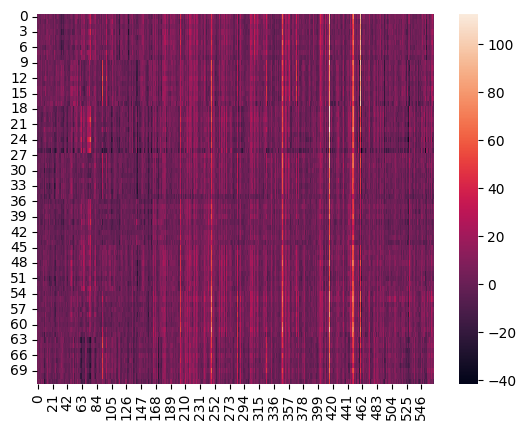

In [ ]:
fig, ax = plt.subplots()

beta = nb.load(fname)
## (# interest, # voxels)
print(beta.shape)
sns.heatmap(beta.get_fdata(),ax=ax)
plt.show()

---

In [53]:
# %whos